In [21]:
import pandas as pd
import numpy as np

In [14]:
actuator_positions = pd.read_csv('19JuneFirstTake_sync.csv')
# actuator_positions = actuator_positions.iloc[50:]
actuator_positions.head()

,time,A0,A1,A2,A5,A6,A7
0,0.000000,3.02,1.87,0.28,2.45,0.14,0.0
1,0.046863,2.95,1.80,0.00,1.87,0.00,0.0
2,0.078058,2.95,1.80,0.07,2.16,0.00,0.0
3,0.109227,3.02,1.65,0.00,2.01,0.00,0.0
4,0.140454,3.17,1.80,0.07,2.30,0.07,0.0


In [23]:
xyz_coordinates = pd.read_csv("minitens_success.csv")
xyz_coordinates = xyz_coordinates[5:]
xyz_coordinates = xyz_coordinates.reset_index(drop=True)
xyz_coordinates = xyz_coordinates[['1.1', 'Take Name', "Take 2025-06-19 02.14.31 PM", "Capture Frame Rate"]]
xyz_coordinates.columns = ["time", 'X', 'Z', 'Y']
xyz_coordinates['X'] = xyz_coordinates['X'].astype(float)
xyz_coordinates['Y'] = xyz_coordinates['Y'].astype(float)
xyz_coordinates['Z'] = xyz_coordinates['Z'].astype(float)
xyz_coordinates['time'] = xyz_coordinates['time'].astype(float)
xyz_coordinates.head()

,time,X,Z,Y
0,0.000000,-0.629333,1.169218,0.844733
1,0.019608,-0.629251,1.169269,0.844620
2,0.039216,-0.629225,1.169302,0.844531
3,0.058824,-0.629201,1.169369,0.844454
4,0.078431,-0.629148,1.169372,0.844372


In [24]:
xyz_coordinates.dropna(inplace=True)
actuator_positions.dropna(inplace=True)

In [25]:
print(actuator_positions.info())
print(xyz_coordinates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18165 entries, 0 to 18164
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18165 non-null  float64
 1   A0      18165 non-null  float64
 2   A1      18165 non-null  float64
 3   A2      18165 non-null  float64
 4   A5      18165 non-null  float64
 5   A6      18165 non-null  float64
 6   A7      18165 non-null  float64
dtypes: float64(7)
memory usage: 993.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34911 entries, 0 to 34910
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    34911 non-null  float64
 1   X       34911 non-null  float64
 2   Z       34911 non-null  float64
 3   Y       34911 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB
None


18165 entries for Actuator Positions and 34911 entries for XYZ Coordinates. We will match them by closest time-stamp. 

In [26]:
# Find closest XYZ timestamp for each actuator timestamp
def find_closest_xyz(actuator_time, xyz_times):
    """Return index of closest XYZ timestamp for a given actuator timestamp"""
    time_diff = np.abs(xyz_times - actuator_time)
    return np.argmin(time_diff)

# Get array of XYZ timestamps
xyz_times = xyz_coordinates['time'].values

# Find matching indices
matching_indices = [find_closest_xyz(t, xyz_times) for t in actuator_positions['time']]

# Extract the matching XYZ data
matched_xyz = xyz_coordinates.iloc[matching_indices].reset_index(drop=True)

# Combine with actuator data (excluding the XYZ time column to avoid duplication)
combined_data = pd.concat([
    actuator_positions.reset_index(drop=True),
    matched_xyz[['X', 'Y', 'Z']].reset_index(drop=True)
], axis=1)

In [29]:
combined_data.head()

,time,A0,A1,A2,A5,A6,A7,X,Y,Z
0,0.000000,3.02,1.87,0.28,2.45,0.14,0.0,-0.629333,0.844733,1.169218
1,0.046863,2.95,1.80,0.00,1.87,0.00,0.0,-0.629225,0.844531,1.169302
2,0.078058,2.95,1.80,0.07,2.16,0.00,0.0,-0.629148,0.844372,1.169372
3,0.109227,3.02,1.65,0.00,2.01,0.00,0.0,-0.629085,0.844232,1.169426
4,0.140454,3.17,1.80,0.07,2.30,0.07,0.0,-0.629038,0.844166,1.169454


In [30]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18165 entries, 0 to 18164
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18165 non-null  float64
 1   A0      18165 non-null  float64
 2   A1      18165 non-null  float64
 3   A2      18165 non-null  float64
 4   A5      18165 non-null  float64
 5   A6      18165 non-null  float64
 6   A7      18165 non-null  float64
 7   X       18165 non-null  float64
 8   Y       18165 non-null  float64
 9   Z       18165 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB


In [31]:
combined_data.to_csv('19JuneDataset.csv', index=False)

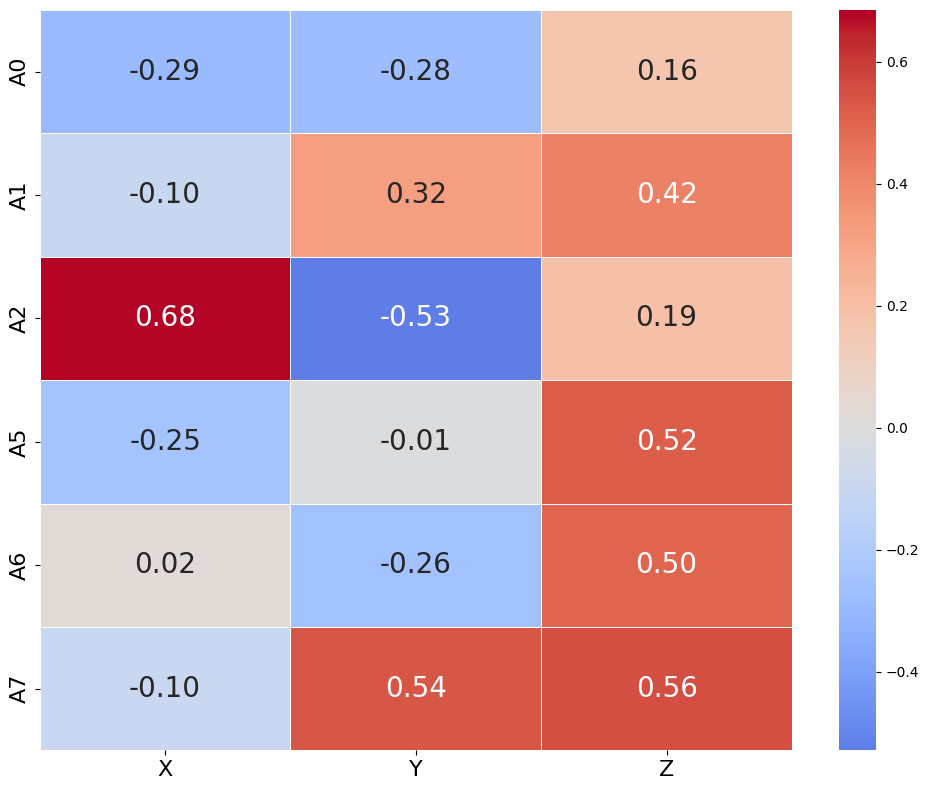

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


dataset = pd.read_csv('19JuneDataset.csv')
corr_matrix = dataset[["A0", "A1", "A2", "A5", "A6", "A7","X", "Y", "Z"]].corr().filter(items=["A0", "A1", "A2", "A5", "A6", "A7"], axis=0).filter(items=["X", "Y", "Z"], axis=1)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt=".2f",
            linewidths=.5,
            annot_kws={"size": 20})

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
